In [161]:
# Copy this file and then run an experiment
# Import modules
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import importlib
import pickle  # Use this to save results so we don't need to rerun experiments
rf = importlib.import_module("random-forests")
misclass_rate = rf.random_forests.misclassification_rate
cmap = {"iris": "blue", "wine": "purple", "heart": "red", "titanic": "green", "breast": "orange"}
def comp_mean_sd(arr):
    return np.array([np.mean(arr), np.std(arr)])
def get_mean_sd(results):
    ret = {}
    for k in results.keys():
        ret[k] = np.apply_along_axis(comp_mean_sd, 1, results[k])
    return ret

In [162]:
# Load all datasets to use
mushroom = np.loadtxt("agaricus-lepiota.data", dtype=str, delimiter=",")
wine = np.loadtxt("wine.data", delimiter=",")
iris = np.loadtxt("iris_csv.csv", dtype=str, delimiter=",")
heart = np.loadtxt("processed.cleveland.data", dtype=str, delimiter=",")
titanic = pd.read_csv("titanic.csv").drop(columns=["PassengerId", "Name", "Ticket", "Cabin"]).dropna()
breast = np.loadtxt("breast-cancer.data", delimiter=",", dtype=str)

In [163]:
# Clean data
def str_in_arr(arr, str):
    return not np.isin(str, arr)
barr_mushroom = np.apply_along_axis(str_in_arr, 1, mushroom, "?")
mushroom = mushroom[barr_mushroom, :]
barr_breast = np.apply_along_axis(str_in_arr, 1, breast, "?")
breast = breast[barr_breast, :]
barr_heart = np.apply_along_axis(str_in_arr, 1, heart, "?")
heart = heart[barr_heart, :]
heart = heart.astype(float)

In [164]:
# Separate into data and labels
iris_data = iris[1:, :4].astype(float)
iris_labels = iris[1:, 4]
wine_data = wine[:, 1:]
wine_labels = wine[:, 0].astype(int)
heart_data = heart[:, :-1]
heart_labels = heart[:, -1].astype(int)
# Turn heart_labels into array of 0, 1.
# 1 indicates presence of any type of heart disease, 0 indicates no presence
heart_labels_barr = heart_labels >= 1
heart_labels[heart_labels_barr] = 1
mushroom_data = mushroom[:, 1:]
mushroom_labels = mushroom[:, 0]
breast_data = breast[:, 1:]
breast_labels = breast[:, 0]
titanic_data = titanic.loc[:, titanic.columns!="Survived"].to_numpy()  # feature_type: complex
titanic_labels = titanic["Survived"].to_numpy()

In [165]:
# Record the feature types
iris_ftype = "continuous"
heart_ftype = np.array([0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1])
wine_ftype = "continuous"
mushroom_ftype = "categorical"
breast_ftype = "categorical"
titanic_ftype = np.array([1, 1, 0, 0, 0, 0, 1])

In [166]:
# Set the seed so test train split it always the same for all tests
np.random.seed(1)
datasets = {"iris": (*train_test_split(iris_data, iris_labels, stratify=iris_labels), "continuous"),
            "wine": (*train_test_split(wine_data, wine_labels, stratify=wine_labels), "continuous"),
            "heart": (*train_test_split(heart_data, heart_labels, stratify=heart_labels), heart_ftype),
            "mushroom": (*train_test_split(mushroom_data, mushroom_labels, stratify=mushroom_labels), "categorical"),
            "titanic": (*train_test_split(titanic_data, titanic_labels, stratify=titanic_labels), titanic_ftype),
            "breast" : (*train_test_split(breast_data, breast_labels, stratify=breast_labels), "categorical")}

In [31]:
# number of experiments to run for each parameter choice
nexp = 10
results = {}
ntrees=np.arange(1,11)

In [40]:
dataset = "iris"
X_train, X_test, y_train, y_test, ftype = datasets[dataset]
result = np.empty((3, len(ntrees), nexp), dtype=float)
m_feats = np.array([1, int(np.floor(np.sqrt(X_train.shape[1]))), X_train.shape[1]])
n_cands = 3*m_feats
np.random.seed(1)
for i, m_feat in enumerate(m_feats):
    n_cand = n_cands[i]
    for j, ntree in enumerate(ntrees):
        for k in range(nexp):
            random_forest = rf.RandomForest(n_trees=ntree, n_candidates=n_cand, max_depth=10)
            random_forest.fit(X_train, y_train, feature_type=ftype, m_features=m_feat)
            result[i, j, k] = misclass_rate(random_forest.predict(X_test), y_test)
results[dataset] = result

In [43]:
dataset = "wine"
X_train, X_test, y_train, y_test, ftype = datasets[dataset]
result = np.empty((3, len(ntrees), nexp), dtype=float)
m_feats = np.array([1, int(np.floor(np.sqrt(X_train.shape[1]))), X_train.shape[1]])
n_cands = 3*m_feats
np.random.seed(1)
for i, m_feat in enumerate(m_feats):
    n_cand = n_cands[i]
    for j, ntree in enumerate(ntrees):
        for k in range(nexp):
            random_forest = rf.RandomForest(n_trees=ntree, n_candidates=n_cand, max_depth=10)
            random_forest.fit(X_train, y_train, feature_type=ftype, m_features=m_feat)
            result[i, j, k] = misclass_rate(random_forest.predict(X_test), y_test)
results[dataset] = result

In [44]:
dataset = "heart"
X_train, X_test, y_train, y_test, ftype = datasets[dataset]
result = np.empty((3, len(ntrees), nexp), dtype=float)
m_feats = np.array([1, int(np.floor(np.sqrt(X_train.shape[1]))), X_train.shape[1]])
n_cands = 3*m_feats
np.random.seed(1)
for i, m_feat in enumerate(m_feats):
    n_cand = n_cands[i]
    for j, ntree in enumerate(ntrees):
        for k in range(nexp):
            random_forest = rf.RandomForest(n_trees=ntree, n_candidates=n_cand, max_depth=10)
            random_forest.fit(X_train, y_train, feature_type=ftype, m_features=m_feat)
            result[i, j, k] = misclass_rate(random_forest.predict(X_test), y_test)
results[dataset] = result

In [45]:
dataset = "titanic"
X_train, X_test, y_train, y_test, ftype = datasets[dataset]
result = np.empty((3, len(ntrees), nexp), dtype=float)
m_feats = np.array([1, int(np.floor(np.sqrt(X_train.shape[1]))), X_train.shape[1]])
n_cands = 3*m_feats
np.random.seed(1)
for i, m_feat in enumerate(m_feats):
    n_cand = n_cands[i]
    for j, ntree in enumerate(ntrees):
        for k in range(nexp):
            random_forest = rf.RandomForest(n_trees=ntree, n_candidates=n_cand, max_depth=10)
            random_forest.fit(X_train, y_train, feature_type=ftype, m_features=m_feat)
            result[i, j, k] = misclass_rate(random_forest.predict(X_test), y_test)
results[dataset] = result

In [46]:
dataset = "mushroom"
X_train, X_test, y_train, y_test, ftype = datasets[dataset]
result = np.empty((3, len(ntrees), nexp), dtype=float)
m_feats = np.array([1, int(np.floor(np.sqrt(X_train.shape[1]))), X_train.shape[1]])
n_cands = 3*m_feats
np.random.seed(1)
for i, m_feat in enumerate(m_feats):
    n_cand = n_cands[i]
    for j, ntree in enumerate(ntrees):
        for k in range(nexp):
            print(i, j, k)
            random_forest = rf.RandomForest(n_trees=ntree, n_candidates=n_cand, max_depth=10)
            random_forest.fit(X_train, y_train, feature_type=ftype, m_features=m_feat)
            result[i, j, k] = misclass_rate(random_forest.predict(X_test), y_test)
results[dataset] = result

0 0 0
0 0 1
0 0 2
0 0 3
0 0 4
0 0 5
0 0 6
0 0 7
0 0 8
0 0 9
0 1 0
0 1 1
0 1 2
0 1 3
0 1 4
0 1 5
0 1 6
0 1 7
0 1 8
0 1 9
0 2 0
0 2 1
0 2 2
0 2 3
0 2 4
0 2 5
0 2 6
0 2 7
0 2 8
0 2 9
0 3 0
0 3 1
0 3 2
0 3 3
0 3 4
0 3 5
0 3 6
0 3 7
0 3 8
0 3 9
0 4 0
0 4 1
0 4 2
0 4 3
0 4 4
0 4 5
0 4 6
0 4 7
0 4 8
0 4 9
0 5 0
0 5 1
0 5 2
0 5 3
0 5 4
0 5 5
0 5 6
0 5 7
0 5 8
0 5 9
0 6 0
0 6 1
0 6 2
0 6 3
0 6 4
0 6 5
0 6 6
0 6 7
0 6 8
0 6 9
0 7 0
0 7 1
0 7 2
0 7 3
0 7 4
0 7 5
0 7 6
0 7 7
0 7 8
0 7 9
0 8 0
0 8 1
0 8 2
0 8 3
0 8 4
0 8 5
0 8 6
0 8 7
0 8 8
0 8 9
0 9 0
0 9 1
0 9 2
0 9 3
0 9 4
0 9 5
0 9 6
0 9 7
0 9 8
0 9 9
1 0 0
1 0 1
1 0 2
1 0 3
1 0 4
1 0 5
1 0 6
1 0 7
1 0 8
1 0 9
1 1 0
1 1 1
1 1 2
1 1 3
1 1 4
1 1 5
1 1 6
1 1 7
1 1 8
1 1 9
1 2 0
1 2 1
1 2 2
1 2 3
1 2 4
1 2 5
1 2 6
1 2 7
1 2 8
1 2 9
1 3 0
1 3 1
1 3 2
1 3 3
1 3 4
1 3 5
1 3 6
1 3 7
1 3 8
1 3 9
1 4 0
1 4 1
1 4 2
1 4 3
1 4 4
1 4 5
1 4 6
1 4 7
1 4 8
1 4 9
1 5 0
1 5 1
1 5 2
1 5 3
1 5 4
1 5 5
1 5 6
1 5 7
1 5 8
1 5 9
1 6 0
1 6 1
1 6 2
1 6 3
1 6 4
1 6 5
1 6 

In [169]:
dataset = "breast"
X_train, X_test, y_train, y_test, ftype = datasets[dataset]
result = np.empty((3, len(ntrees), nexp), dtype=float)
m_feats = np.array([1, int(np.floor(np.sqrt(X_train.shape[1]))), X_train.shape[1]])
n_cands = 3*m_feats
np.random.seed(1)
for i, m_feat in enumerate(m_feats):
    n_cand = n_cands[i]
    for j, ntree in enumerate(ntrees):
        for k in range(nexp):
            print(i, j, k)
            random_forest = rf.RandomForest(n_trees=ntree, n_candidates=n_cand, max_depth=10)
            random_forest.fit(X_train, y_train, feature_type=ftype, m_features=m_feat)
            result[i, j, k] = misclass_rate(random_forest.predict(X_test), y_test)
results[dataset] = result

0 0 0
0 0 1
0 0 2
0 0 3
0 0 4
0 0 5
0 0 6
0 0 7
0 0 8
0 0 9
0 1 0
0 1 1
0 1 2
0 1 3
0 1 4
0 1 5
0 1 6
0 1 7
0 1 8
0 1 9
0 2 0
0 2 1
0 2 2
0 2 3
0 2 4
0 2 5
0 2 6
0 2 7
0 2 8
0 2 9
0 3 0
0 3 1
0 3 2
0 3 3
0 3 4
0 3 5
0 3 6
0 3 7
0 3 8
0 3 9
0 4 0
0 4 1
0 4 2
0 4 3
0 4 4
0 4 5
0 4 6
0 4 7
0 4 8
0 4 9
0 5 0
0 5 1
0 5 2
0 5 3
0 5 4
0 5 5
0 5 6
0 5 7
0 5 8
0 5 9
0 6 0
0 6 1
0 6 2
0 6 3
0 6 4
0 6 5
0 6 6
0 6 7
0 6 8
0 6 9
0 7 0
0 7 1
0 7 2
0 7 3
0 7 4
0 7 5
0 7 6
0 7 7
0 7 8
0 7 9
0 8 0
0 8 1
0 8 2
0 8 3
0 8 4
0 8 5
0 8 6
0 8 7
0 8 8
0 8 9
0 9 0
0 9 1
0 9 2
0 9 3
0 9 4
0 9 5
0 9 6
0 9 7
0 9 8
0 9 9
1 0 0
1 0 1
1 0 2
1 0 3
1 0 4
1 0 5
1 0 6
1 0 7
1 0 8
1 0 9
1 1 0
1 1 1
1 1 2
1 1 3
1 1 4
1 1 5
1 1 6
1 1 7
1 1 8
1 1 9
1 2 0
1 2 1
1 2 2
1 2 3
1 2 4
1 2 5
1 2 6
1 2 7
1 2 8
1 2 9
1 3 0
1 3 1
1 3 2
1 3 3
1 3 4
1 3 5
1 3 6
1 3 7
1 3 8
1 3 9
1 4 0
1 4 1
1 4 2
1 4 3
1 4 4
1 4 5
1 4 6
1 4 7
1 4 8
1 4 9
1 5 0
1 5 1
1 5 2
1 5 3
1 5 4
1 5 5
1 5 6
1 5 7
1 5 8
1 5 9
1 6 0
1 6 1
1 6 2
1 6 3
1 6 4
1 6 5
1 6 

In [170]:
results["breast"]

array([[[0.27142857, 0.37142857, 0.3       , 0.47142857, 0.35714286,
         0.35714286, 0.42857143, 0.31428571, 0.3       , 0.31428571],
        [0.35714286, 0.35714286, 0.38571429, 0.38571429, 0.41428571,
         0.28571429, 0.3       , 0.37142857, 0.35714286, 0.32857143],
        [0.34285714, 0.3       , 0.32857143, 0.25714286, 0.37142857,
         0.34285714, 0.27142857, 0.37142857, 0.34285714, 0.34285714],
        [0.25714286, 0.37142857, 0.28571429, 0.25714286, 0.31428571,
         0.27142857, 0.3       , 0.28571429, 0.31428571, 0.22857143],
        [0.35714286, 0.3       , 0.31428571, 0.25714286, 0.31428571,
         0.34285714, 0.22857143, 0.31428571, 0.21428571, 0.27142857],
        [0.3       , 0.28571429, 0.3       , 0.28571429, 0.31428571,
         0.2       , 0.32857143, 0.34285714, 0.28571429, 0.21428571],
        [0.21428571, 0.25714286, 0.28571429, 0.27142857, 0.3       ,
         0.22857143, 0.28571429, 0.21428571, 0.34285714, 0.27142857],
        [0.27142857, 0.2857

In [171]:
results.keys()

dict_keys(['iris', 'wine', 'heart', 'titanic', 'mushroom', 'breast'])

In [172]:
po = open("vary_m_features_n_trees_breast.pickle", "wb")
pickle.dump(results, po)
po.close()

In [173]:
def comp_mean_sd(arr):
    return np.array([np.mean(arr), np.std(arr)])
def m_sd3d(results):
    ret = {}
    for k in results.keys():
        m_sds = np.empty((3, len(ntrees), 2))
        for i in range(3):
            m_sds[i, :, :] = np.apply_along_axis(comp_mean_sd, 1, results[k][i])
        ret[k] = m_sds
    return ret

In [174]:
mean_sd = m_sd3d(results)

In [176]:
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], linestyle="-.", color='k'),
                Line2D([0], [0], linestyle="-", color='k'),
                Line2D([0], [0], linestyle=":", color='k'),
                Line2D([0], [0], color='blue'),
                Line2D([0], [0], color='purple'),
                Line2D([0], [0], color='red'),
                Line2D([0], [0], color='green'),
                Line2D([0], [0], color='orange')]
def plot2():
    style = {0: "^-.", 1: "o-", 2: "x:"}
    labels = {0: 1, 1: "sqrt(# features)", 2: "all features"}
    for dataset in results.keys():
        if dataset == "mushroom":
            continue
        m_sds = mean_sd[dataset]
        for i in range(3):
        # i = 0
            plt.errorbar(ntrees, m_sds[i, :, 0], yerr=m_sds[i, :, 1]/np.sqrt(nexp), capsize=5, fmt=style[i],  c=cmap[dataset], label=labels[i])
    plt.legend(custom_lines, ["m_features=1", "m_features=floor(sqrt(#feats))", "m_features=#feats", "iris",
                              "wine", "heart", "titanic", "breast"], ncol=2)
    plt.ylabel("Misclassification rate")
    plt.xlabel("n_trees")
    plt.title("Effect of m_features on misclassification rate")
    plt.axis([0.5,10,0,0.6])

In [153]:
def plot(dataset):
    m_sds = mean_sd[dataset]
    style = {0: "^-.", 1: "o-", 2: "x:"}
    labels = {0: 1, 1: "sqrt(# features)", 2: "all features"}
    for i in range(3):
    # i = 0
        plt.errorbar(ntrees, m_sds[i, :, 0], yerr=m_sds[i, :, 1]/np.sqrt(nexp), capsize=5, fmt=style[i],  c=cmap[dataset], label=labels[i])
    plt.legend()
    plt.ylabel("Misclassification rate")
    plt.xlabel("n_trees")
    plt.title("Effect of m_features on misclassification rate")
    plt.axis([0,10,0,0.5])

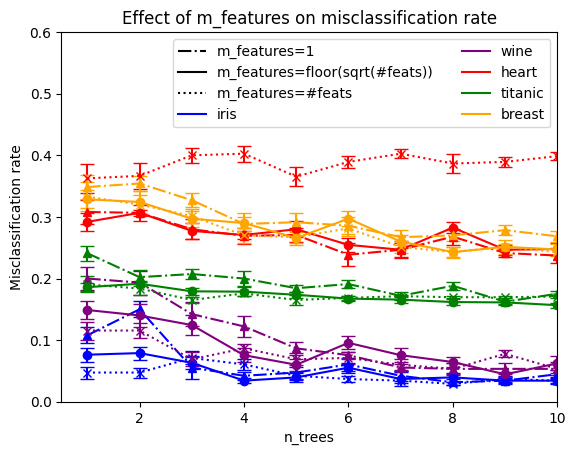

In [177]:
plot2()

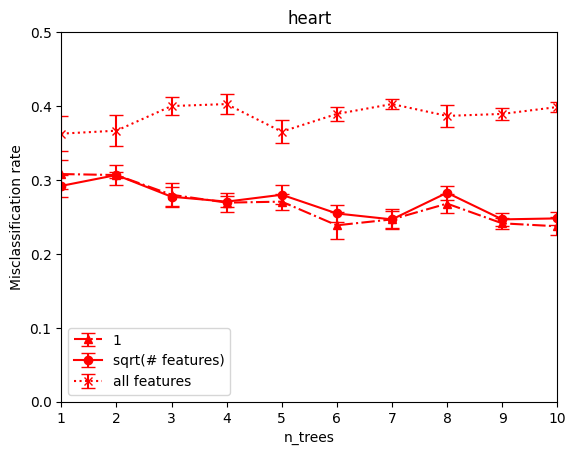

In [129]:
plot("heart")

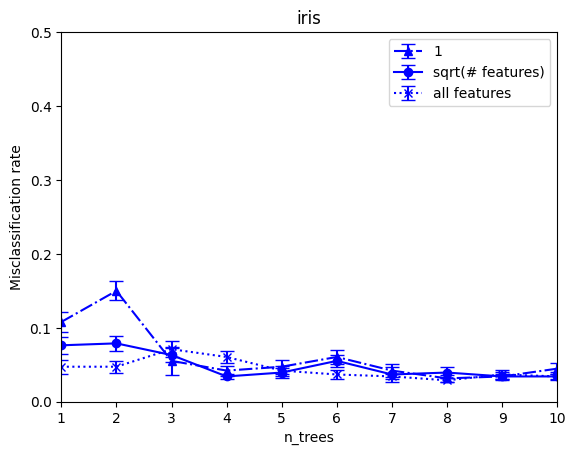

In [130]:
plot("iris")